# Project: Regression Modeling with the Boston Housing Dataset

## Introduction

In this lab, you'll apply the regression analysis and diagnostics techniques covered in this section to the "Boston Housing" dataset. You performed a detailed EDA for this dataset earlier on, and hopefully, you more or less recall how this data is structured! In this lab, you'll use some of the features in this dataset to create a linear model to predict the house price!

## Objectives
You will be able to:
* Perform a linear regression using statsmodels
* Determine if a particular set of data exhibits the assumptions of linear regression
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters
* Use the coefficient of determination to determine model performance
* Interpret the parameters of a simple linear regression model in relation to what they signify for specific data


## Let's get started

### Import necessary libraries and load 'BostonHousing.csv' as a pandas dataframe

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('ggplot')

df = pd.read_csv('BostonHousing.csv')
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


The columns in the Boston housing data represent the dependent and independent variables. The dependent variable here is the median house value `MEDV`. The description of the other variables is available on [KAGGLE](https://www.kaggle.com/c/boston-housing). 

### Inspect the columns of the dataset and comment on type of variables present

'''
all floats except as noted
crim - Per capita crime rate by town
zn - proportion zoned for lots >25k sq ft
indus - proportion of non-retail business acres per town
chas - 1 if bounds charles river, 2 if not (int) 
nox - nitrogen oxide pptm
rm - avg # rms per dwelling
age - proportion owner occupied dwellings built before 1940
dis - weighted mean distance to five employment centers
rad - index of accessibility to radial highways (int) 
tax - full value tax rate per $10k (int) 
black - proportion of blacks per town
lstat - lower status of popultion by percentage
medv - median value of owner-occ homes by $1k
'''

In [ ]:
# Record your observations here  --- see above

### Create histograms for all variables in the dataset and comment on their shape (uniform or not?)

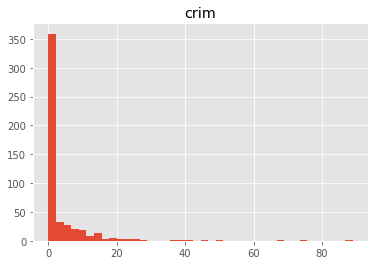

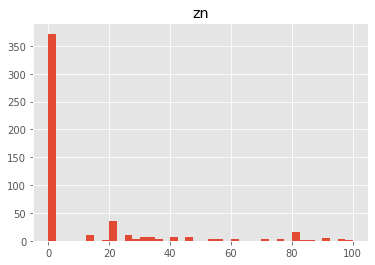

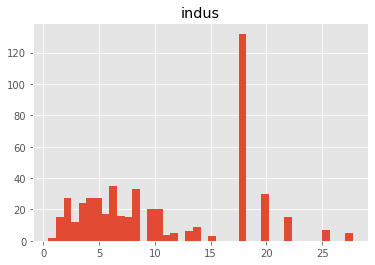

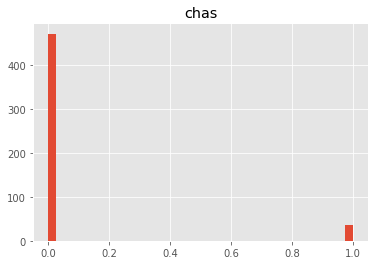

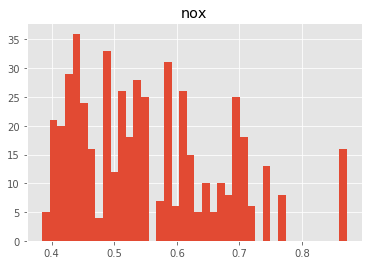

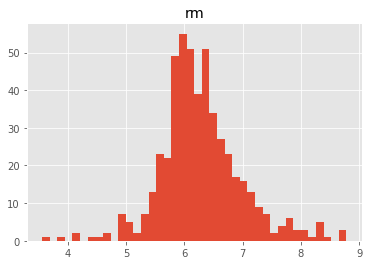

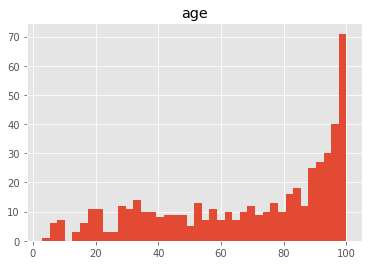

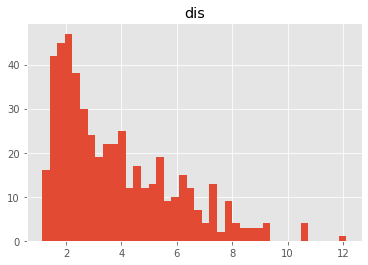

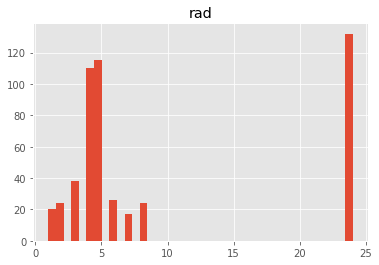

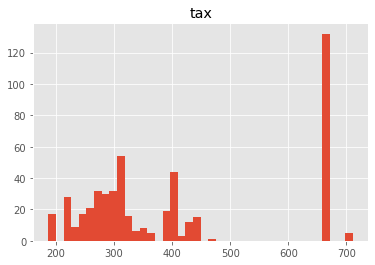

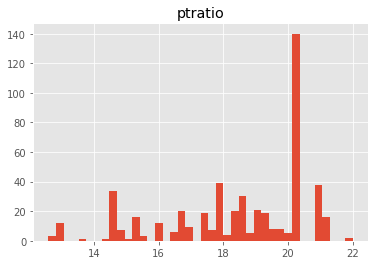

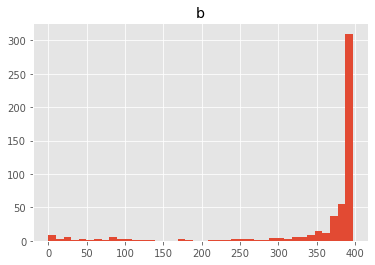

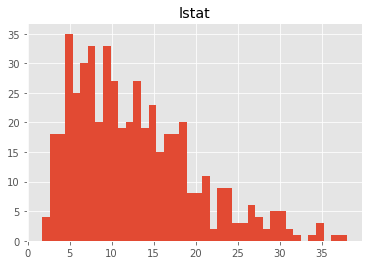

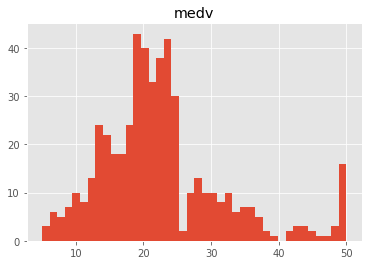

In [3]:
# Your code here 
for column in df:
    plt.hist(df[column], bins = 40)
    plt.title(column)
    plt.show()

'''
rm appears to be the only normally distributed variable
medv is the next best bet
lstat, dis, and age all seem very skewed'''

Based on this, we preselected some features  for you which appear to be more 'normal' than others.
### Create a new dataset with `['crim', 'dis', 'rm', 'zn', 'age', 'medv']`

In [4]:
# Your code here
dset = df[['crim', 'dis', 'rm', 'zn', 'age', 'medv']]
dset.head()

,crim,dis,rm,zn,age,medv
0,0.00632,4.0900,6.575,18.0,65.2,24.0
1,0.02731,4.9671,6.421,0.0,78.9,21.6
2,0.02729,4.9671,7.185,0.0,61.1,34.7
3,0.03237,6.0622,6.998,0.0,45.8,33.4
4,0.06905,6.0622,7.147,0.0,54.2,36.2


### Check the linearity assumption for all chosen features with target variable using scatter plots

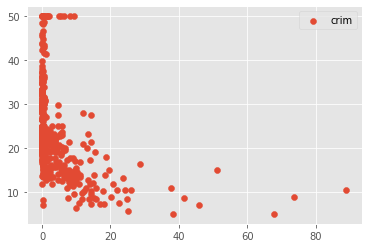

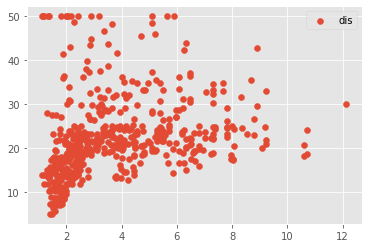

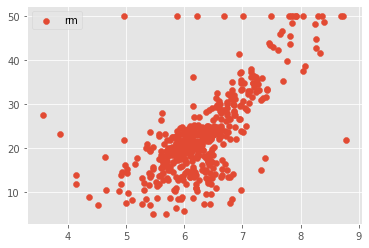

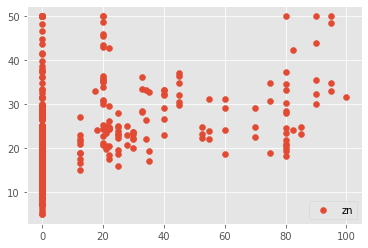

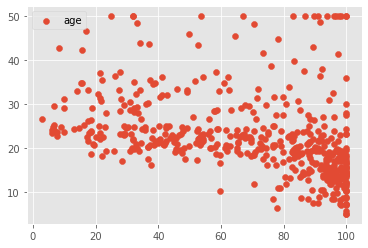

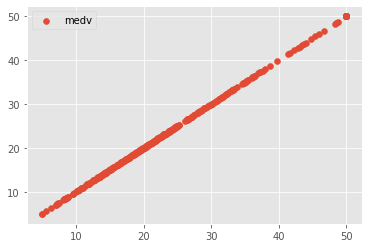

In [5]:
for column in dset:
    plt.scatter(dset[column], dset['medv'], label=column)
    plt.legend()
    plt.show()

 
'''
dis, rm, and age all appear to have some degree of linearity; zn is hard to tell
lots of outliers in all sets; perhaps cleaning would help this
'''

Clearly, your data needs a lot of preprocessing to improve the results. This key behind a Kaggle competition is to process the data in such a way that you can identify the relationships and make predictions in the best possible way. For now, we'll use the dataset untouched and just move on with the regression. The assumptions are not _exactly_ all fulfilled, but they still hold to a level that we can move on. 

### Let's do Regression 

Now, let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). You'll do this in a loop and in every iteration, you should pick one of the independent variables. Perform the following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot a regression line on the scatter plots
* Plot the residuals using `sm.graphics.plot_regress_exog()`
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~crim


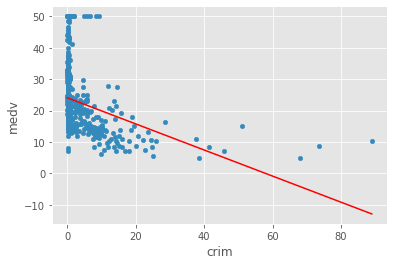

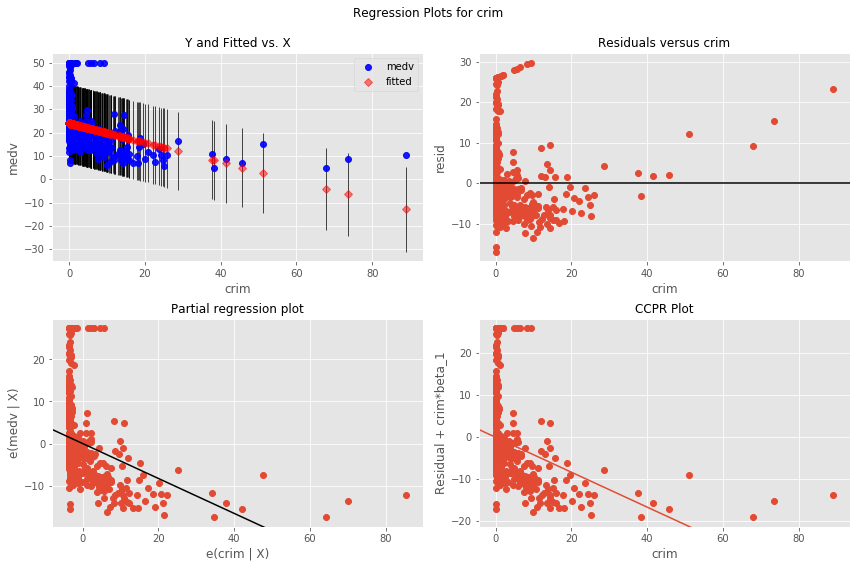

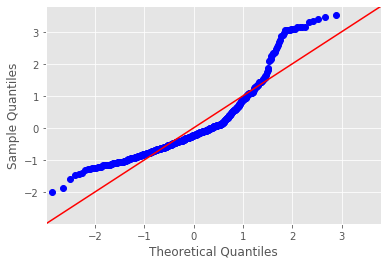

Press Enter to continue...
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~dis


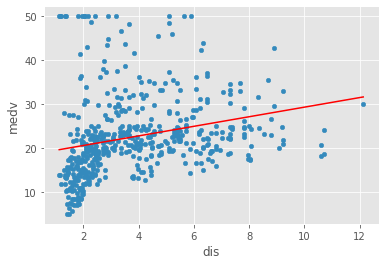

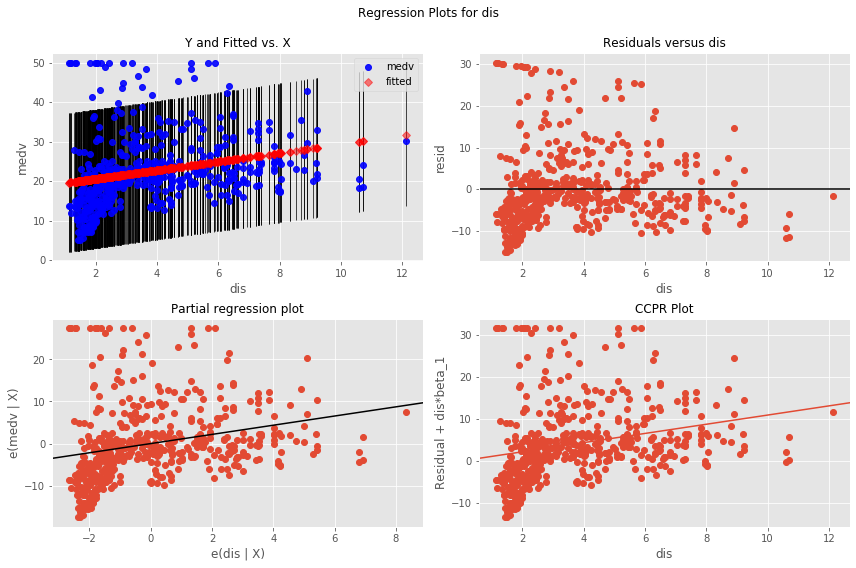

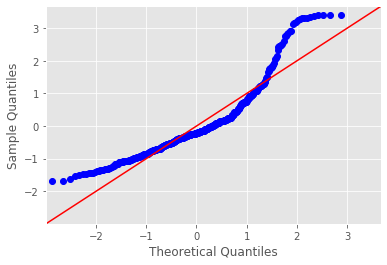

Press Enter to continue...
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~rm


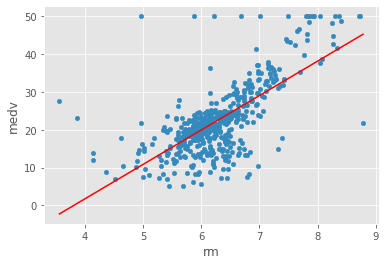

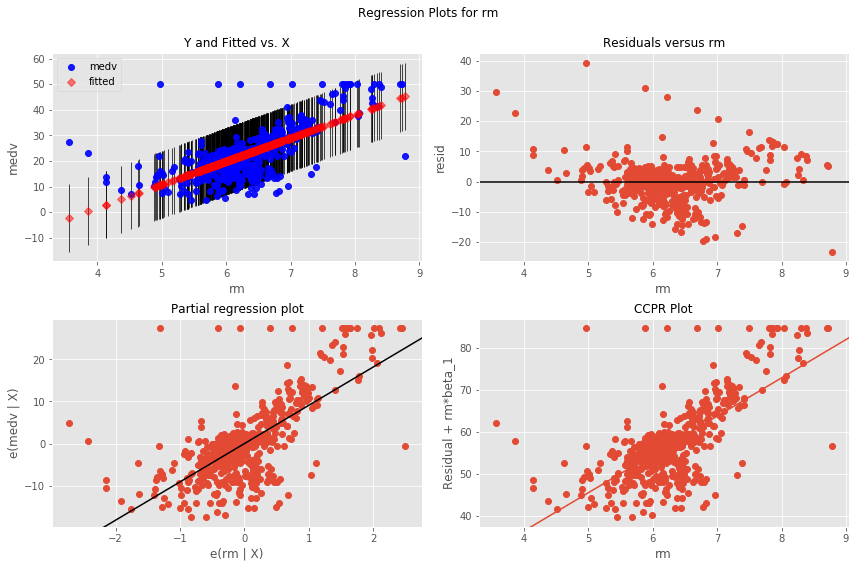

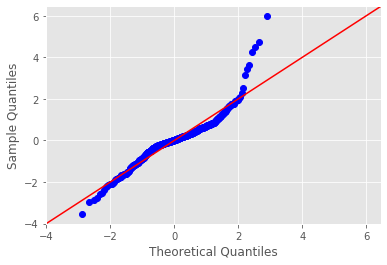

Press Enter to continue...
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~zn


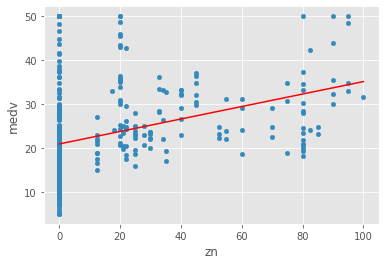

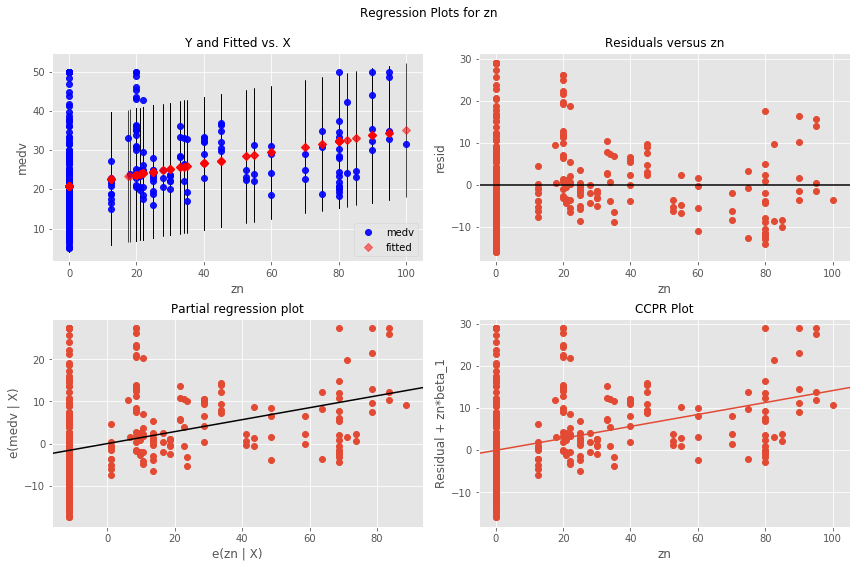

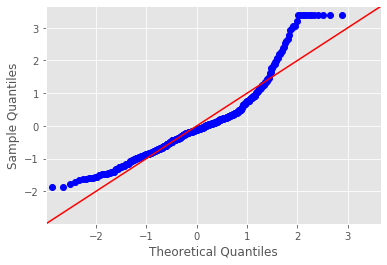

Press Enter to continue...
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~age


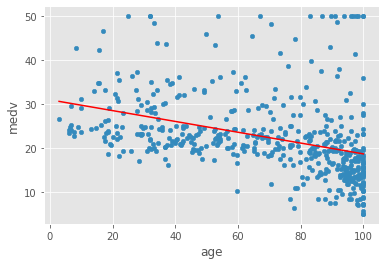

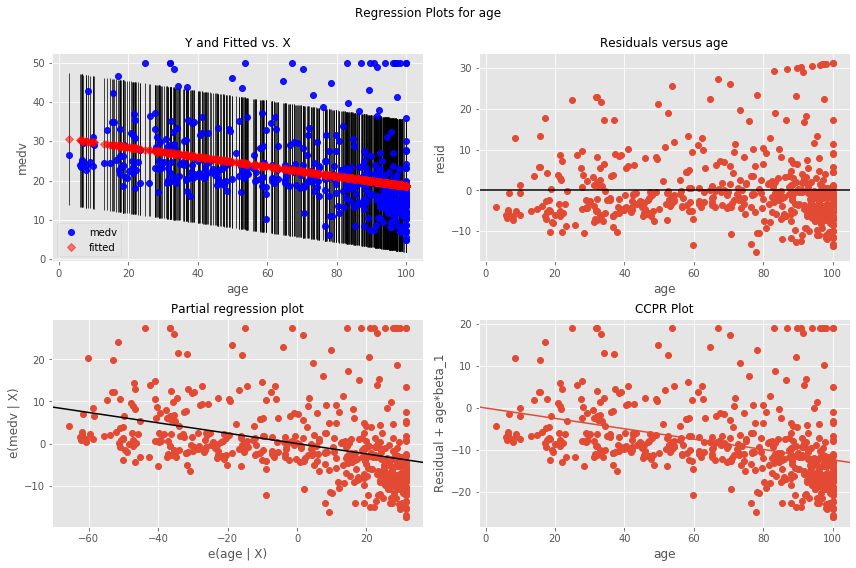

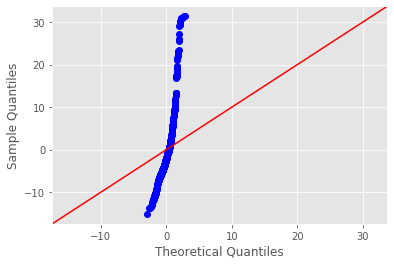

Press Enter to continue...


In [6]:
results = [['independ_var', 'R_squared', 'Intercept', 'Slope', 'P-value', 'Normality (JB)' ]]
for index, value in enumerate(['crim', 'dis', 'rm', 'zn', 'age']):
    print ("Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~" + value)
    
    # Regression Plot:
    f = 'medv~' + value
    model = smf.ols(formula=f, data=dset).fit()
    
    reg_line = pd.DataFrame({value: [dset[value].min(), dset[value].max()]});
    predictions = model.predict(reg_line)
    dset.plot(kind='scatter', x=value, y='medv');
    plt.plot(reg_line, predictions, c='red');
    plt.show()
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_regress_exog(model, value, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
    plt.show()
    
    results.append([value, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])
    input("Press Enter to continue...")

In [8]:
pd.DataFrame(results)

,0,1,2,3,4,5
0,ind_var,r_squared,intercept,slope,p-value,normality (JB)
1,crim,0.15078,24.0331,-0.41519,1.17399e-19,295.404
2,dis,0.0624644,18.3901,1.09161,1.20661e-08,305.104
3,rm,0.483525,-34.6706,9.10211,2.48723e-74,612.449
4,zn,0.129921,20.9176,0.14214,5.71358e-17,262.387
5,age,0.142095,30.9787,-0.123163,1.56998e-18,456.983


YOUR OBSERVATIONS HERE:  

Crim:  negative relationship, some heteroscadasticity, horrible R^2, high JB (unreliable)

Dis: positive relationship (almost 1:1), horrible R^2, some heteroscadasticity, high JB.

Rm: best R^2, positive relationship (significantly so), really high JB
the only decent R^2 is rm 

Zn: positive relationship to value, some heteroscadasticity, really low R^2. 

Age: negative relationship, some heteroscadasticity, horrible R^2 


Clearly, the results are not very reliable. The best R-Squared is witnessed with `rm`, so in this analysis, this is our best predictor. 

### How can you improve these results?
1. Preprocessing 

This is where the preprocessing of data comes in. Dealing with outliers, normalizing data, scaling values etc. can help regression analysis get more meaningful results from the given data. 

2. Advanced Analytical Methods

Simple regression is a very basic analysis technique and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. Later on, you'll explore multiple regression where you can use multiple features **at once** to define a relationship with the outcome. You'll also look at some preprocessing and data simplification techniques and revisit the Boston dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in the previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the goodness of fit. 

## Summary 

In this lab, you applied your skills learned so far on a new data set. You looked at the outcome of your analysis and realized that the data might need some preprocessing to see a clear improvement in the results. You'll pick this back up later on, after learning about more preprocessing techniques and advanced modeling techniques.